In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Okay! We're going back to our bike path dataset here. I live in Montreal, and I was curious about whether we're more of a commuter city or a biking-for-fun city -- do people bike more on weekends, or on weekdays?

##  Adding a 'weekday' column to our dataframe

First, we need to load up the data. We've done this before.

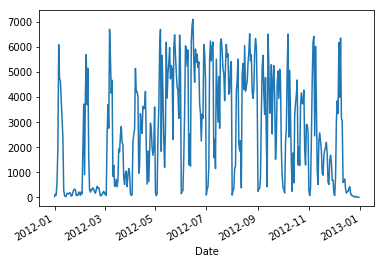

In [2]:
bikes = pd.read_csv('bikes.csv', parse_dates=['Date'], index_col='Date')
bikes['Berri1'].plot()

Next up, we're just going to look at the Berri bike path. Berri is a street in Montreal, with a pretty important bike path. So we're going to create a dataframe with just the Berri bikepath in it

In [3]:
berri_bikes = bikes[['Berri1']].copy()

In [4]:
berri_bikes[:5]

,Berri1
Date,
2012-01-01,35
2012-02-01,83
2012-03-01,135
2012-04-01,144
2012-05-01,197


Next, we need to add a 'weekday' column. Firstly, we can get the weekday from the index. We haven't talked about indexes yet, but the index is what's on the left on the above dataframe, under 'Date'. It's basically all the days of the year.

In [5]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

You can see that actually some of the days are missing -- only 310 days of the year are actually there. Who knows why.

Pandas has a bunch of really great time series functionality, so if we wanted to get the day of the month for each row, we could do it like this:

In [6]:
berri_bikes.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=366)

We actually want the weekday, though:

In [7]:
berri_bikes.index.weekday

Int64Index([6, 2, 3, 6, 1, 4, 6, 2, 5, 0,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=366)

These are the days of the week, where 0 is Monday. I found out that 0 was Monday by checking on a calendar.

Now that we know how to *get* the weekday, we can add it as a column in our dataframe like this:

In [8]:
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

,Berri1,weekday
Date,,
2012-01-01,35,6
2012-02-01,83,2
2012-03-01,135,3
2012-04-01,144,6
2012-05-01,197,1


## Adding up the cyclists by weekday

This turns out to be really easy!

Dataframes have a `.groupby()` method that is similar to SQL groupby, or R's group_by. You use group by with aggreate to summarise by one of your variables. Group by takes each unique value of a variable and makes a new data-frame where that summarises other variables by those unique values. If the variable that you group by as 10 unique values, you'll have a data-frame with 10 rows after using groupby and aggregate. 

In this case, `berri_bikes.groupby('weekday').aggregate(sum)` means "Group the rows by weekday and then add up all the values with the same weekday". There are 7 unique week days, so you end up with 7 rows of the data-frame. 

In [9]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri1
weekday,
0,140206
1,132563
2,156623
3,158044
4,155651
5,123719
6,113428


It's hard to remember what 0, 1, 2, 3, 4, 5, 6 mean, so we can fix it up and graph it:

In [10]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri1
Monday,140206
Tuesday,132563
Wednesday,156623
Thursday,158044
Friday,155651
Saturday,123719
Sunday,113428


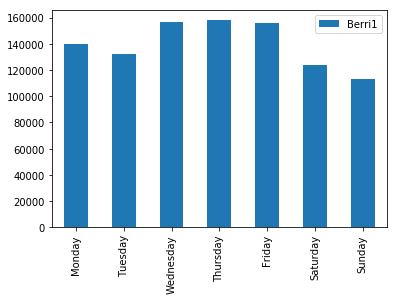

In [11]:
weekday_counts.plot(kind='bar')

If you just want to know how many rows there are for each day of the week you can use `size`.

In [12]:
berri_bikes.groupby('weekday').size()

weekday
0    53
1    52
2    52
3    52
4    52
5    52
6    53
dtype: int64

So it looks like Montrealers are commuter cyclists -- they bike much more during the week. Neat!

##  Putting it together

Let's put all that together, to prove how easy it is. 6 lines of magical pandas!

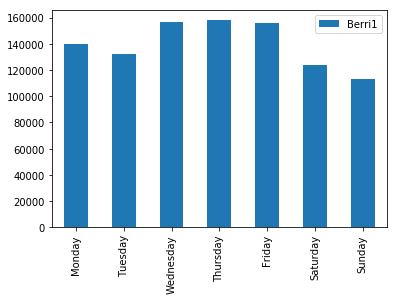

In [13]:
bikes = pd.read_csv('bikes.csv',  
                    parse_dates=['Date'],
                    index_col='Date')
# Add the weekday column
berri_bikes = bikes[['Berri1']].copy()
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday

# Add up the number of cyclists by weekday, and plot!
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts.plot(kind='bar')

### Excercise

1. Find the number of rides for each day of the week in bike route 'Maisonneuve_2'.
2. Find the average number of rides for each day of the week in Maisonneve 2. (Hint: you'll need to import numpy and use np.mean)
3. Find the total rides on each month of the year in Maisonneve 2. 
4. Plot the average number of rides as a barchart and a line. What do you notice that's different about the x-axis for the two plots? 

In [14]:
mais2_bikes = bikes[['Maisonneuve_2']].copy()
mais2_bikes.loc[:,'weekday'] = mais2_bikes.index.weekday
mais2_bikes.groupby('weekday').aggregate(sum)

,Maisonneuve_2
weekday,
0,173675
1,162262
2,190218
3,190903
4,188838
5,132358
6,122742


In [15]:
mais2_bikes.groupby('weekday').aggregate(np.mean)

,Maisonneuve_2
weekday,
0,3276.886792
1,3120.423077
2,3658.038462
3,3671.211538
4,3631.500000
5,2545.346154
6,2315.886792


In [16]:
mais2_bikes = bikes[['Maisonneuve_2']].copy()
mais2_bikes.loc[:,'month'] = mais2_bikes.index.month
month_counts = mais2_bikes.groupby('month').aggregate(sum)
month_counts

,Maisonneuve_2
month,
1,36777
2,39374
3,69141
4,91260
5,147053
6,143501
7,151504
8,137451
9,118040


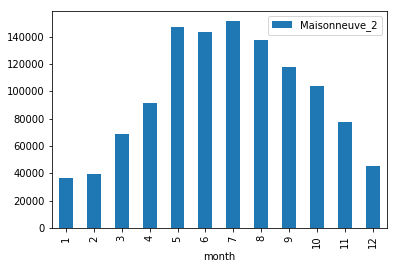

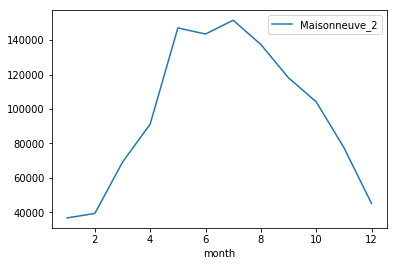

In [17]:
month_counts.plot(kind = 'bar')
month_counts.plot(kind = 'line')